# Introduction to Machine Learning

## read the dataset

In [1]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/ganjar87/data_science_practice/main/healthcare-dataset-stroke-data.csv', delimiter = ",")
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [2]:
#untuk melihat statistical details
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


## check persentase target class

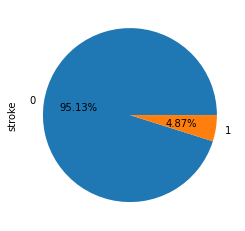

In [3]:
import matplotlib.pyplot as plt

data = df['stroke'].value_counts()
data.plot(kind='pie',autopct='%.2f%%')
plt.show() 

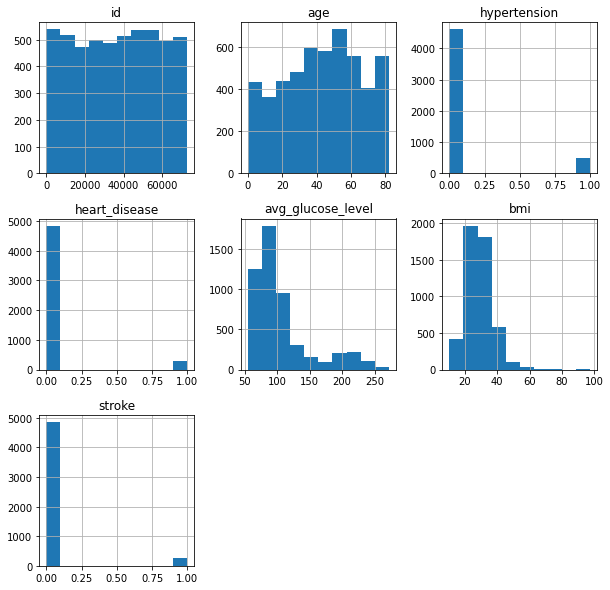

In [4]:
# check histogram for continuous columns
df.hist(figsize=(10,10))
plt.show()

In [5]:
#check correlation coef
df.corr()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
id,1.000000,0.003538,0.003550,-0.001296,0.001092,0.003084,0.006388
age,0.003538,1.000000,0.276398,0.263796,0.238171,0.333398,0.245257
hypertension,0.003550,0.276398,1.000000,0.108306,0.174474,0.167811,0.127904
heart_disease,-0.001296,0.263796,0.108306,1.000000,0.161857,0.041357,0.134914
avg_glucose_level,0.001092,0.238171,0.174474,0.161857,1.000000,0.175502,0.131945
bmi,0.003084,0.333398,0.167811,0.041357,0.175502,1.000000,0.042374
stroke,0.006388,0.245257,0.127904,0.134914,0.131945,0.042374,1.000000


## check missing values

In [6]:
df.isnull().sum()

#nilai bmi ada yg kosong

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

## check categorical attributes

In [8]:
df_X = df.drop(['id',	'stroke'],axis=1)
df_y = df[['stroke']]
cats = df_X.select_dtypes(include=['object', 'bool']).columns
print(cats)

Index(['gender', 'ever_married', 'work_type', 'Residence_type',
       'smoking_status'],
      dtype='object')


## Logistic Regression for classification

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be import

Accuracy  0.9419439008480104
Precision  0.4709719504240052
Recall  0.5
Confusion matrix  [[1444    0]
 [  89    0]]


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


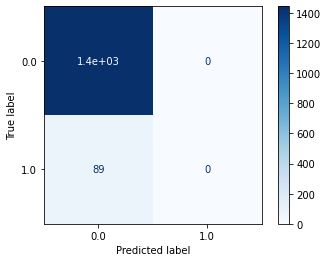

In [9]:
# import library yg dibutuhkan
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from imblearn.metrics import sensitivity_specificity_support
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression

# data preprocessing dimulai
# membuat X and y. X untuk input variable, y untuk target class
df_X = df.drop(['id',	'stroke'],axis=1)
df_y = df[['stroke']]

#label encoding for y. 
#merubah nilai yg ada di y menjadi 0 atau 1.
#sebenarnya ini tidak diperlukan karena nilai y di dataset sudah 0 atau 1
le = LabelEncoder()
df_y= le.fit_transform(df_y['stroke'])

#imputation. kita isi nilai kosong yg di kolom bmi dengan nilai median nya (atau bisa pakai cara lain)
df_X['bmi'].fillna(df_X['bmi'].median(), inplace=True)

#categorical encoding
#merubah categorical value menjadi numerical value
#bisa pakai label encoding, ordinal atau one hot encoding
cats = df_X.select_dtypes(include=['object', 'bool']).columns
cat_features = list(cats.values)
le = LabelEncoder()
for i in cat_features:
  df_X[i] = le.fit_transform(df_X[i])

#menyimpan X dan y menjadi numpy arrays
X = df_X.astype(float).values
y = df_y.astype(float)

#hold-out method, dibagi menjadi training dan testing set. 70% training, 30% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#scaling
scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# data preprocessing selesai

#mulai melakukan modelling. model ML learning dari training set 
model=LogisticRegression()
model.fit(X_train, y_train)

# membuat prediksi
y_pred = model.predict(X_test)

#menghitung performa model, dengan accuracy dll
print('Accuracy ',accuracy_score(y_test, y_pred))    
print('Precision ',precision_score(y_test, y_pred, average='macro'))  
print('Recall ',recall_score(y_test, y_pred, average='macro')) 
print('Confusion matrix ', confusion_matrix(y_test, y_pred)) 
plot_confusion_matrix(model, X_test, y_test, cmap=plt.cm.Blues)  
plt.show()

## melihat coefficients-nya

In [12]:
model.coef_

array([[-0.01926181,  1.5514967 ,  0.10348619,  0.07940788, -0.18090425,
        -0.06958962,  0.05980281,  0.1976799 , -0.03397277,  0.02276299]])

## melihat intercept-nya


In [13]:
model.intercept_

array([-4.04479423])

# Contoh sederhana dengan menggunakan single input variable 

---



In [14]:
#baca dataset dari pima diabetes
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/ganjar87/data_science_practice/main/diabetes.csv', delimiter = ",")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


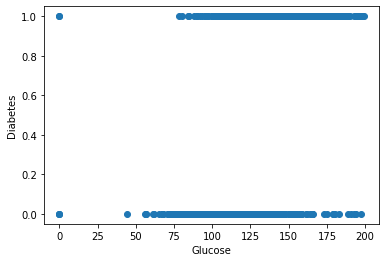

In [15]:
## lihat sebaran data berdasarkan class-nya
import matplotlib.pyplot as plt

plt.scatter(df['Glucose'],df['Outcome'])
plt.xlabel('Glucose')
plt.ylabel('Diabetes') 
plt.show()

## logistic regression dengan single input

Accuracy  0.7229437229437229
Precision  0.6932143538843291
Recall  0.667591059602649
Confusion matrix  [[128  23]
 [ 41  39]]


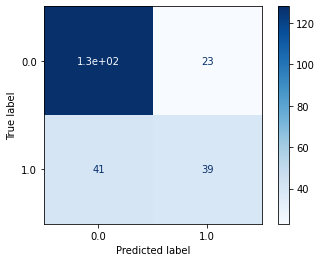

In [16]:
X = df['Glucose'].astype(float).values
y = df['Outcome'].astype(float)
X=X.reshape(-1, 1)
#hold out, dibagi menjadi training dan testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#mulai melakukan modelling. model ML learning dari training set 
model=LogisticRegression()
model.fit(X_train, y_train)

# membuat prediksi
y_pred = model.predict(X_test)

#menghitung performa model, dengan accuracy dll
print('Accuracy ',accuracy_score(y_test, y_pred))    
print('Precision ',precision_score(y_test, y_pred, average='macro'))  
print('Recall ',recall_score(y_test, y_pred, average='macro')) 
print('Confusion matrix ', confusion_matrix(y_test, y_pred)) 
plot_confusion_matrix(model, X_test, y_test, cmap=plt.cm.Blues)  
plt.show()

## lihat coefficient dan intercept-nya

In [17]:
model.coef_

array([[0.04033676]])

In [18]:
model.intercept_

array([-5.6523997])

## plot logistic function nya dengan single input

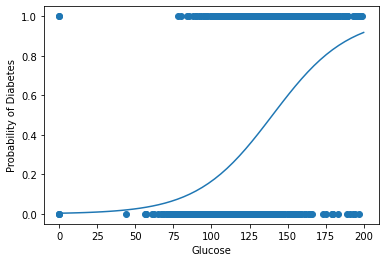

In [19]:
import numpy as np
x = np.linspace(0, 200)
#logistic function
#masukkan coefficient dan intercept yg dihasilkan model LR diatas
p = 1/(1 + np.exp
       (-(0.04033676*x -5.6523997)))
plt.scatter(df['Glucose'],df['Outcome'])
plt.plot(x,p)
plt.xlabel('Glucose')
plt.ylabel('Probability of Diabetes') 
plt.show()

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


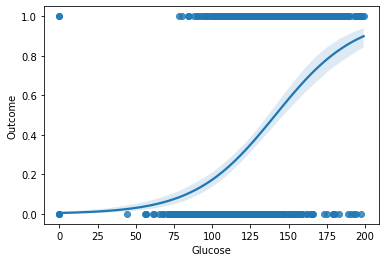

In [20]:
#bisa pakai cara simple menggunakan seaborn
import seaborn as sns
sns.regplot(x='Glucose', y='Outcome',data=df, logistic=True)

## mencoba memprediksi data baru

In [21]:
# misalkan blood glucose/gula darah patient adalah 190 mg/dL.
# apakah diprediksi diabetes atau tidak?
# masukkan 190 sebagai x nya
# hasil output adalah probabilitas patient terkena diabetes, diatas 0.5 berarti diabetes = yes
p = 1/(1 + np.exp
       (-(0.04033676*190 -5.6523997)))
print(p)

0.8820080415547628
